  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20461  100 20461    0     0  83864      0 --:--:-- --:--:-- --:--:-- 84201


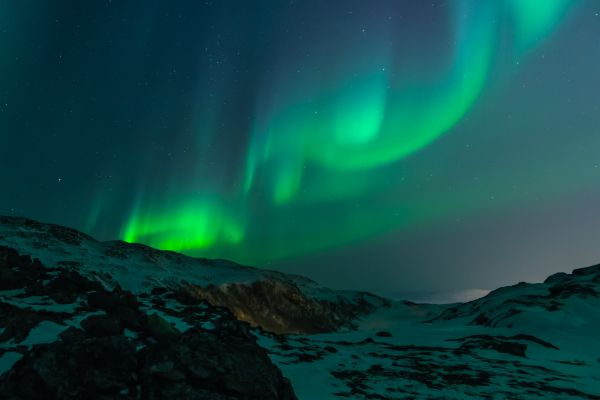

In [8]:
#Bibliotecas básicas e baixando imagem de teste.
import cv2 as cv
import numpy as np
import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Download sample image from internet
!curl -O 'https://www.w3schools.com/w3images/lights.jpg'
img = cv.imread('lights.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
#show image
cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()
# Alternativa é o matlibplot, mas ele troca os canais. Vamos corrigir isso mais para frente.
#plt.imshow(img)

In [12]:
# Acessando um pixel
px = img[100,200]
print(px)

[77 62 13]


In [14]:
# Acessando a cor de um pixel
blue = img[100,200,0]
print(blue)
# faster alternative - img.item(100,100,0)

77


[  0 255   0]


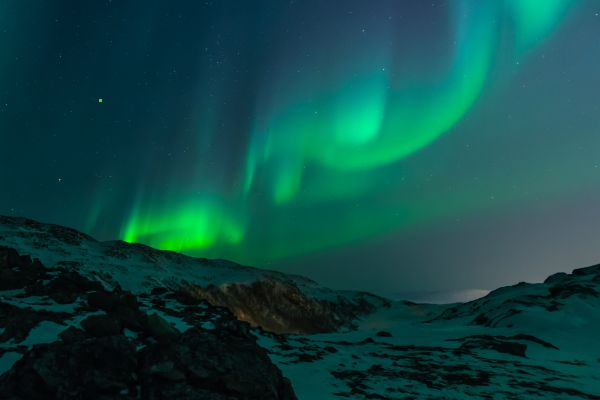

In [19]:
# Modificando a imagem
img[99,99] = [0,255,0]
img[99,100] = [0,255,0]
img[100,99] = [0,255,0]
img[100,100] = [0,255,0]
img[101,101] = [0,255,0]
img[101,100] = [0,255,0]
img[100,101] = [0,255,0]
img[99,101] = [0,255,0]
img[101,99] = [0,255,0]
print(img[100,100])
cv2_imshow(img)
#plt.imshow(img)

In [20]:
# Dimensões e formato da imagem
print(img.shape)
print(img.dtype)

(400, 600, 3)
uint8


(200, 100, 3)


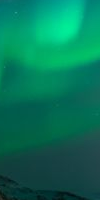

In [24]:
# Escolhendo região de interesse
subimg = img[100:300, 300:400]
# Os parametros x,y respectivamente equivalem a  altura e comprimento
print(subimg.shape)
cv2_imshow(subimg)
cv.waitKey(0)
cv.destroyAllWindows()

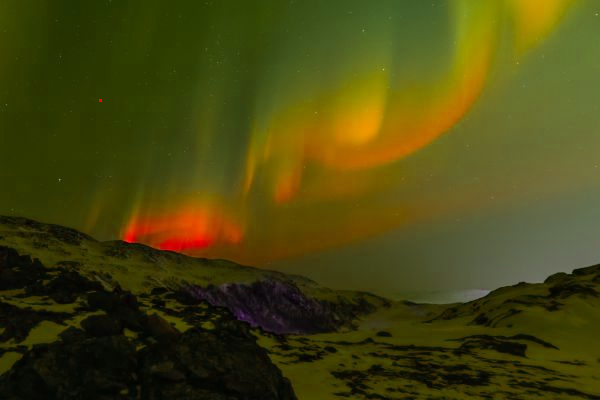

In [27]:
# Separando e juntando canais de cor
#os canais de cor por default são, blue, green, red
b,g,r = cv.split(img)
img2 = cv.merge((r,b,g))
#img2 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
# alternativa mais rápida: b = img[:,:,0]
cv2_imshow(img2)

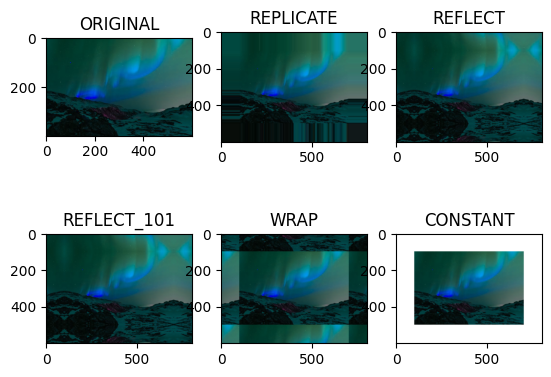

In [31]:
# Criar bordas.
img = img2
bs = 100
replicate = cv.copyMakeBorder(img,bs,bs,bs,bs,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img,bs,bs,bs,bs,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img,bs,bs,bs,bs,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img,bs,bs,bs,bs,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img,bs,bs,bs,bs,cv.BORDER_CONSTANT,value=(255,255,255))
plt.subplot(231),plt.imshow(img),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant),plt.title('CONSTANT')
plt.show()

In [32]:
# Recriando com borda menor.
bs = 5
replicate = cv.copyMakeBorder(img,bs,bs,bs,bs,cv.BORDER_REPLICATE)

In [37]:
# Pegando dimensões
rows,cols,channels = img.shape
rows
channels

3

In [36]:
# Criando imagem de saída
output = np.zeros((rows, cols,channels), dtype="uint8")

In [39]:
# Convolution to blur image (future subject)
elements = (bs+bs+1)*(bs+bs+1)
for c in np.arange(0,channels):
    for y in np.arange(bs, rows + bs):
        for x in np.arange(bs, cols + bs):
            roi = replicate[y - bs:y + bs + 1, x - bs:x + bs + 1,c]
            total = roi.sum() / elements
            output[y - bs, x - bs,c] = total

In [40]:
# Redimensionando saída
output = output[bs:rows + bs,bs:cols + bs,]

Original



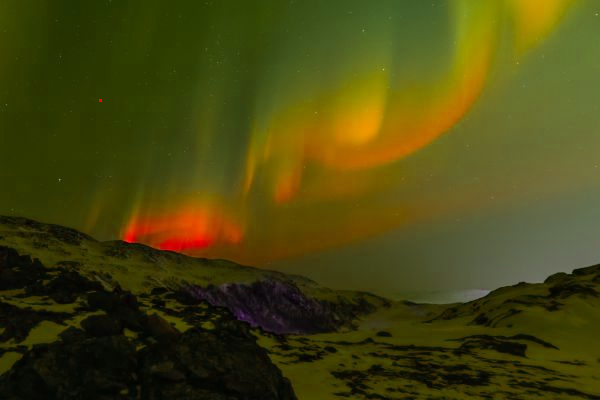


Filtrada



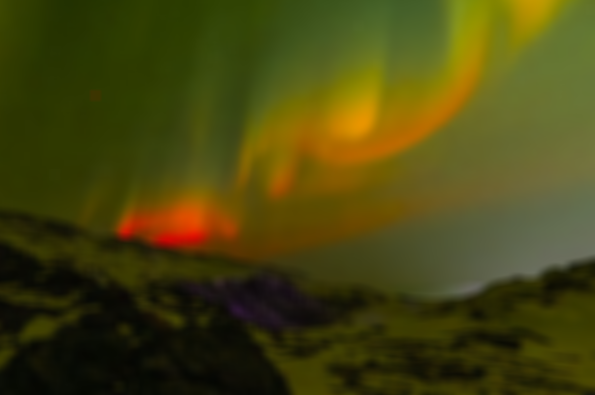

In [45]:
# Comprando as diferenças.
print("Original\n")
cv2_imshow(img,)
print("\nFiltrada\n")
cv2_imshow(output,)
plt.show()

(11, 11, 3) int32


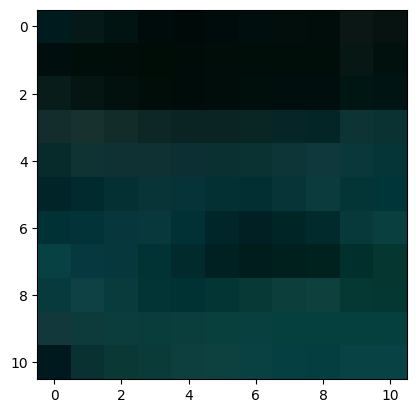

In [46]:
# Agora encontrando o Wally.
init = (300,20)
search_roi = img[init[0]-bs:init[0]+bs+1,init[1]-bs:init[1]+bs+1].astype('int32')
print(search_roi.shape, search_roi.dtype)
plt.imshow(search_roi)

In [47]:
# Convolution to find roi in image
for y in np.arange(bs, rows + bs):
    for x in np.arange(bs, cols + bs):
        roi = replicate[y - bs:y + bs + 1, x - bs:x + bs + 1]
        diff_roi = search_roi - roi
        total = np.absolute(diff_roi).sum()
        if total <= 2000:
            print('Found roi at ', y-bs, ', ', x-bs, ". Total: ", total)

Found roi at  300 ,  18 . Total:  1964
Found roi at  300 ,  19 . Total:  1184
Found roi at  300 ,  20 . Total:  0
Found roi at  300 ,  21 . Total:  1161
Found roi at  300 ,  22 . Total:  1894
